In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [133]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [135]:
cats = ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport', 'NumberOfChildrenVisiting',
        'OwnCar', 'PitchSatisfactionScore', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
nums = ['Age', 'DurationOfPitch','NumberOfTrips', 'NumberOfFollowups', 'NumberOfPersonVisiting' ,'MonthlyIncome']

In [136]:
df_desc = df.copy()
df_desc[cats] = df_desc[cats].astype('object')

In [137]:
df_desc[nums].describe()

,Age,DurationOfPitch,NumberOfTrips,NumberOfFollowups,NumberOfPersonVisiting,MonthlyIncome
count,4662.000000,4637.000000,4748.000000,4843.000000,4888.000000,4655.000000
mean,37.622265,15.490835,3.236521,3.708445,2.905074,23619.853491
std,9.316387,8.519643,1.849019,1.002509,0.724891,5380.698361
min,18.000000,5.000000,1.000000,1.000000,1.000000,1000.000000
25%,31.000000,9.000000,2.000000,3.000000,2.000000,20346.000000
50%,36.000000,13.000000,3.000000,4.000000,3.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,3.000000,25571.000000
max,61.000000,127.000000,22.000000,6.000000,5.000000,98678.000000


In [138]:
df_desc[cats].describe().T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
CityTier,4888,3,1,3190
PreferredPropertyStar,4862.0,3.0,3.0,2993.0
Passport,4888,2,0,3466
NumberOfChildrenVisiting,4822.0,4.0,1.0,2080.0
OwnCar,4888,2,1,3032
PitchSatisfactionScore,4888,5,3,1478
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916


# Data Pre-processing

## Handle missing values

In [141]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [142]:
for col in df.columns:
    print(f'{col} : {df[col].unique()}')

CustomerID : [200000 200001 200002 ... 204885 204886 204887]
ProdTaken : [1 0]
Age : [41. 49. 37. 33. nan 32. 59. 30. 38. 36. 35. 31. 34. 28. 29. 22. 53. 21.
 42. 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60. 61.]
TypeofContact : ['Self Enquiry' 'Company Invited' nan]
CityTier : [3 1 2]
DurationOfPitch : [  6.  14.   8.   9.  30.  29.  33.  22.  21.  32.  25.  27.  11.  17.
  15.  13.  12.  16.  10.  31.  18.  nan  24.  35.  28.  20.  26.  34.
  23.   5.  19. 126.   7.  36. 127.]
Occupation : ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender : ['Female' 'Male' 'Fe Male']
NumberOfPersonVisiting : [3 2 1 4 5]
NumberOfFollowups : [ 3.  4.  2.  5. nan  1.  6.]
ProductPitched : ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
PreferredPropertyStar : [ 3.  4.  5. nan]
MaritalStatus : ['Single' 'Divorced' 'Married' 'Unmarried']
NumberOfTrips : [ 1.  2.  7.  5.  6.  3.  4. 19. 21.  8. nan 20. 22.]
Passport : [1 0]
Pitc

In [143]:
import warnings
warnings.filterwarnings('ignore')

df['Age'].fillna(df['Age'].median(), inplace=True)
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace=True)
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].median(), inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(), inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

In [144]:
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

Kami memilih untuk mempertahankan data (tidak menghapus) dikarenkan dengan mengisi nilai yang kosong dapat menghindari kehilangan informasi berharga, mempertahankan akurasi data, dan menghindari bias data.

Terdapat beberapa kolom yang menggunakan median dikarenakan terdapat distribusi data yang tidak normal seperti Age, DurationOfPitch, NumberOfFollowups. Sedangkan untuk data yang bersifat kategorikal dapat diisi dengan nilai terbanyak/mode.

## Handle duplicated data

In [147]:
df.duplicated(subset=df.columns.difference(['CustomerID'])).sum()

141

In [148]:
df.drop_duplicates(subset=df.columns.difference(['CustomerID']), inplace=True)

In [149]:
df.duplicated(subset=df.columns.difference(['CustomerID'])).sum()

0

Tidak terdapat data duplikasi pada dataset tersebut apabila menyertakan column 'CustomerID', tetapi apabila tanpa columns tersebut akan menghasilkan 141 baris data duplicated. Selanjutnya, kami melakukan penghapusan pada baris duplikat tersebut yang dapat membantu untuk meningkatkan keaslian, akurasi, dan keandalan analisis data.

## Handle outlier

In [152]:
df[nums].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4747 entries, 0 to 4887
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4747 non-null   float64
 1   DurationOfPitch         4747 non-null   float64
 2   NumberOfTrips           4747 non-null   float64
 3   NumberOfFollowups       4747 non-null   float64
 4   NumberOfPersonVisiting  4747 non-null   int64  
 5   MonthlyIncome           4747 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 259.6 KB


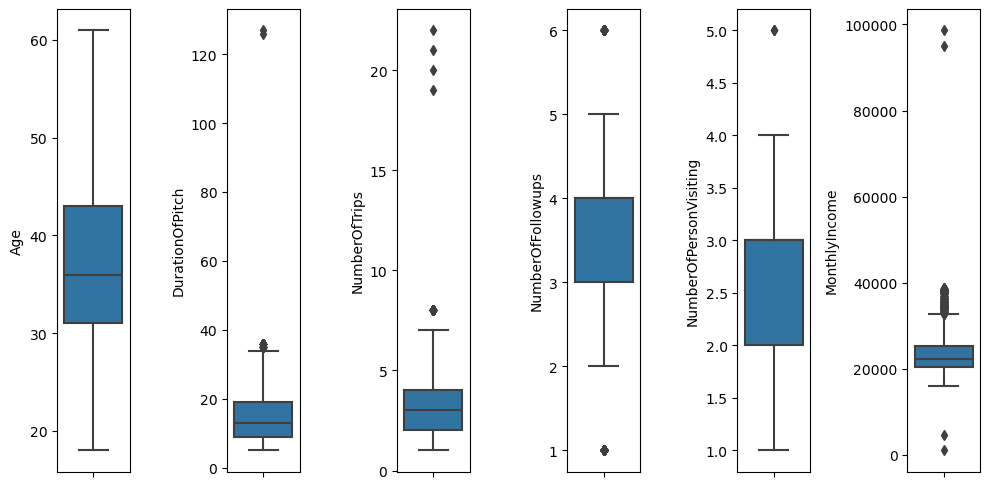

In [153]:
plt.figure(figsize=(10, 5))

for num in range(0, len(nums)):
    plt.subplot(1, len(nums), num+1)
    sns.boxplot(data=df, y=df[nums[num]], orient='v')

plt.tight_layout()
plt.show()

In [154]:
def clear_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    no_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))
    num_row_before = df.shape[0]
    df_clean = df[no_outlier]
    num_row_after = df_clean.shape[0]
    num_dropped = num_row_before - num_row_after

    print(f'Number of rows dropped: {num_dropped}')
    return df_clean

In [155]:
df = clear_outlier(df, 'MonthlyIncome')
df = clear_outlier(df, 'DurationOfPitch')
df = clear_outlier(df, 'NumberOfTrips')

Number of rows dropped: 366
Number of rows dropped: 2
Number of rows dropped: 102


## Feature Encoding

In [157]:
for col in df.columns:
    print(f'{col} : {df[col].unique()}')

CustomerID : [200000 200001 200002 ... 204885 204886 204887]
ProdTaken : [1 0]
Age : [41. 49. 37. 33. 36. 32. 59. 30. 38. 35. 31. 34. 28. 29. 22. 53. 21. 42.
 44. 39. 24. 43. 50. 27. 26. 46. 48. 55. 45. 56. 23. 51. 40. 54. 58. 20.
 25. 19. 57. 52. 47. 18. 60. 61.]
TypeofContact : ['Self Enquiry' 'Company Invited']
CityTier : [3 1 2]
DurationOfPitch : [ 6. 14.  8.  9. 30. 29. 33. 22. 21. 32. 25. 27. 11. 17. 15. 13. 12. 16.
 10. 31. 24. 35. 28. 20. 26. 18. 34. 23. 19.  5.  7. 36.]
Occupation : ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender : ['Female' 'Male' 'Fe Male']
NumberOfPersonVisiting : [3 2 1 4 5]
NumberOfFollowups : [3. 4. 2. 5. 1. 6.]
ProductPitched : ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
PreferredPropertyStar : [3. 4. 5.]
MaritalStatus : ['Single' 'Divorced' 'Married' 'Unmarried']
NumberOfTrips : [1. 2. 7. 5. 6. 3. 4.]
Passport : [1 0]
PitchSatisfactionScore : [2 3 5 4 1]
OwnCar : [1 0]
NumberOfChildrenVisiting : [0. 2. 1. 3.]
Designation : [

In [158]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Unmarried', 'Single')

Kami mengganti value dengan status Unmarried menjadi Single agar distribusi data menjadi lebih sederhana serta menghinari kerancuan data

In [160]:
# encode values
# One-hot encoding
df = pd.get_dummies(data = df, columns=['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus'])

# Label encoding
df['ProductPitched'] = df['ProductPitched'].map({'Deluxe':0, 'Basic':1, 'Standard':2, 'Super Deluxe':3, 'King':4})
df['Designation'] = df['Designation'].map({'Manager':0, 'Executive':1, 'Senior Manager':2, 'AVP':3, 'VP':4})

Pada columns *['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus']* digunakan One-Hot Encoding dikarenakan data bersifat nominal <br>
Sedangkan pada columns *['ProductPitched', 'Designation']* digunakan Label Encoding karena data tersebut bersifat ordinal

In [162]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting',
       'Designation', 'MonthlyIncome', 'TypeofContact_Company Invited',
       'TypeofContact_Self Enquiry', 'Occupation_Free Lancer',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'Gender_Female', 'Gender_Male',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

## Feature transformation

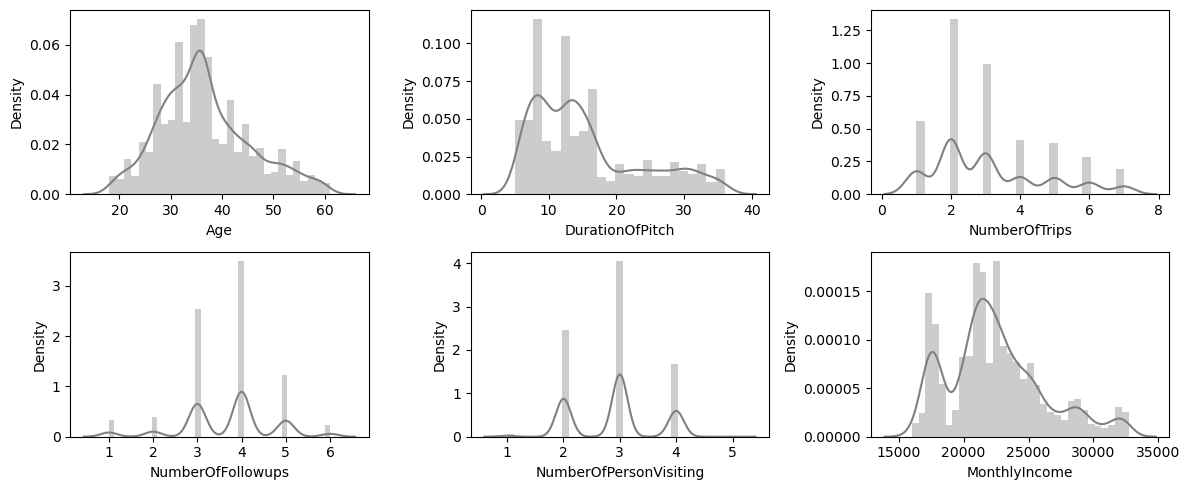

In [164]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

Dapat dilihat dari grafik diatas, distribusi terlihat sudah cukup normal sehingga pada feature transformasi kami menggunakan normaliasi.

In [166]:
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
# Normalisasi
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.fit_transform(X_test)

## Handle class imbalance

In [173]:
y_train.value_counts()

ProdTaken
0    2749
1     672
Name: count, dtype: int64

In [177]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_norm_smote, y_train_norm_smote = smote.fit_resample(X_train_norm, y_train)

In [179]:
y_train_norm_smote.value_counts()

ProdTaken
0    2749
1    2749
Name: count, dtype: int64

Pada handle class imbalance kami menggunakan metode smote yang dapat mempertahankan seluruh data mayoritas, sambil menghasilkan data tambahan untuk kelas minoritas, sehingga tidak ada informasi yang hilang.

SMOTE menghasilkan sampel yang lebih seimbang dan menyebar di ruang fitur, yang dapat membantu model mempelajari lebih banyak pola daripada sekadar fokus pada kelas mayoritas.

# Feature Engineering

## Feature selection

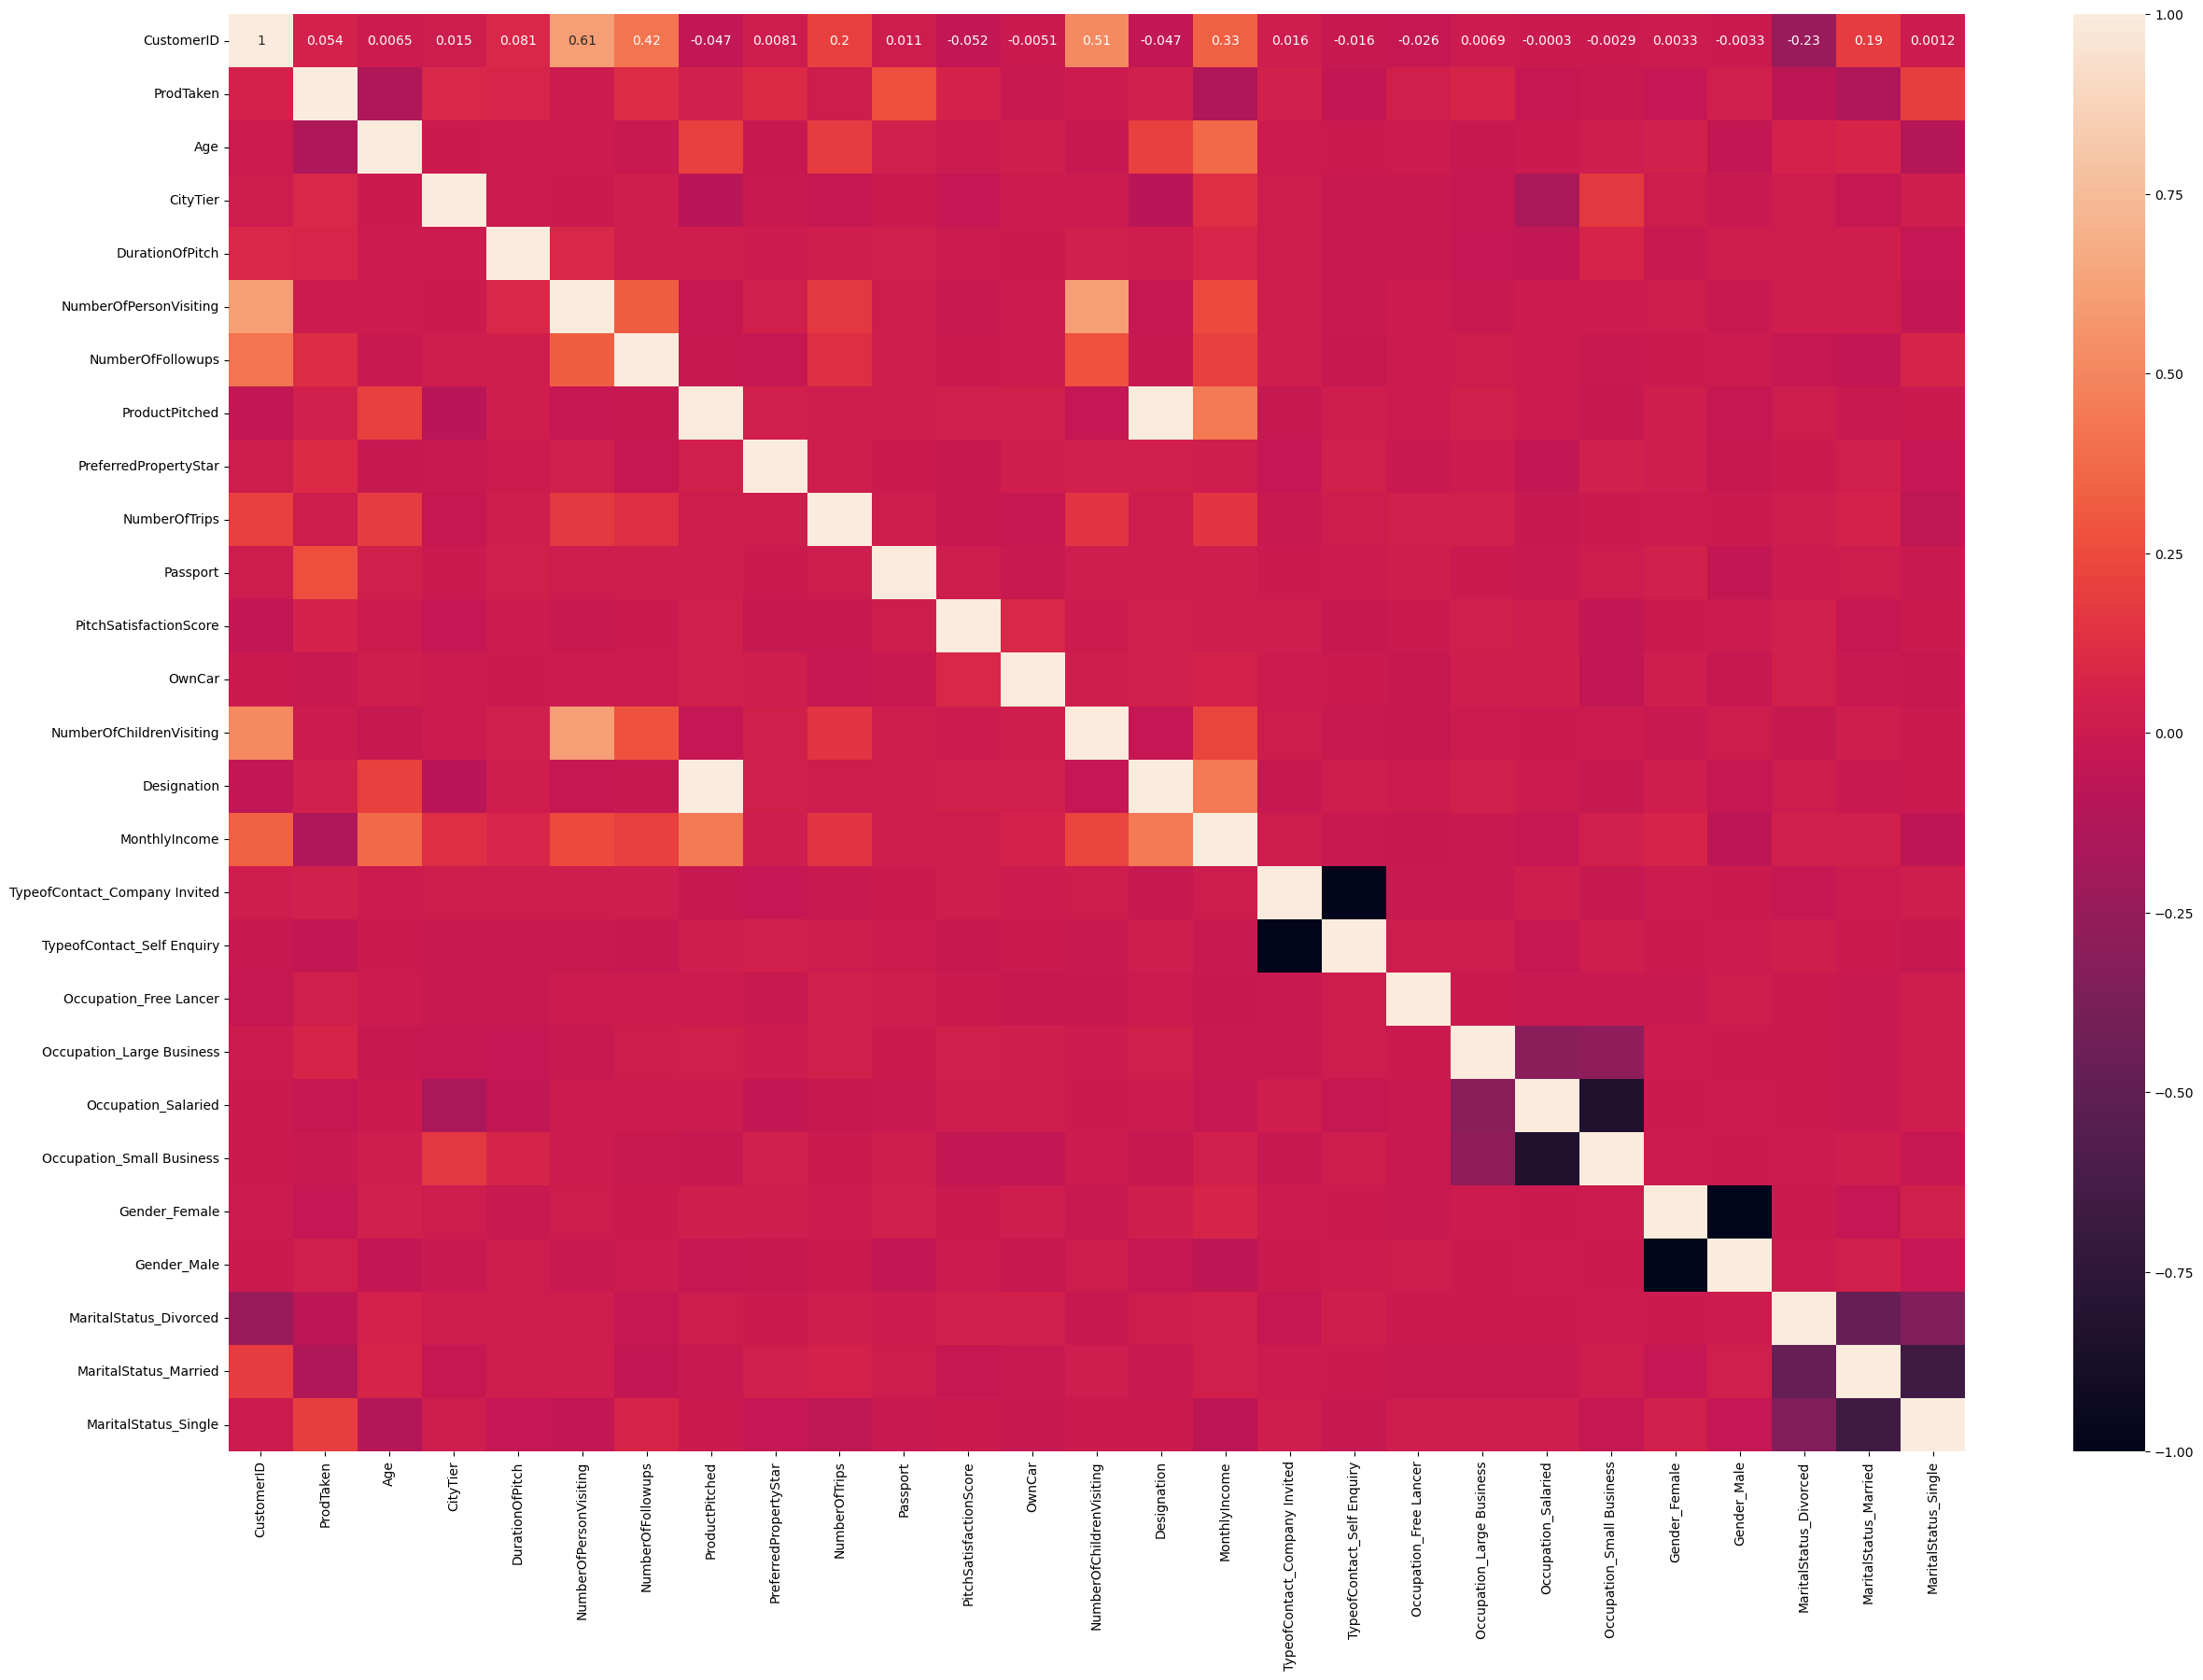

In [181]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [183]:
# drop salah satu diantara column 'ProductPitched' atau 'Designation'

df.drop('ProductPitched', axis=1, inplace=True)

Terdapat dua feature antara 'ProductPitched' dan 'Designation' yang redundant, sehingga kami menghapus salah satu kolom tersebut.

## Feature extraction

In [185]:
df.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,TypeofContact_Self Enquiry,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,...,True,False,False,True,False,True,False,False,False,True
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,...,False,False,False,True,False,False,True,True,False,False
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,...,True,True,False,False,False,False,True,False,False,True
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,...,False,False,False,True,False,True,False,True,False,False
4,200004,0,36.0,1,8.0,2,3.0,4.0,1.0,0,...,True,False,False,False,True,False,True,True,False,False


In [187]:
df['Age'] = df['Age'].apply(lambda age: 'Young' if age < 18 else ('Adult' if 18 <= age < 40 else 'Old'))

Membuat klasifikasi umur (<18 = young, 19-40 = adult, >40 = old)

In [189]:
df.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,TypeofContact_Self Enquiry,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,200000,1,Old,3,6.0,3,3.0,3.0,1.0,1,...,True,False,False,True,False,True,False,False,False,True
1,200001,0,Old,1,14.0,3,4.0,4.0,2.0,0,...,False,False,False,True,False,False,True,True,False,False
2,200002,1,Adult,1,8.0,3,4.0,3.0,7.0,1,...,True,True,False,False,False,False,True,False,False,True
3,200003,0,Adult,1,9.0,2,3.0,3.0,2.0,1,...,False,False,False,True,False,True,False,True,False,False
4,200004,0,Adult,1,8.0,2,3.0,4.0,1.0,0,...,True,False,False,False,True,False,True,True,False,False


Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang  mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya  ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya  dan tidak perlu diimplementasikan)
- Menambahkan fitur HealthRate (mengukur tingkat kesehatan customer) 
- Membuat klasifikasi kepuasan pelanggan
- Membuat klasifikasi berdasarkan pendapatan customer
- Membuat  fitur easy to persuade (membandingkan antara numberOfPitch dengan ProdTaken, semakin kecil numberOfPitch dari pelanggan yang mengambil produk (ProdTaken = 1), maka semakin mudah dibujuk untuk membeli produk